In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import copy
from collections import defaultdict

MAX_INT = float('Inf')

def minDistance(dist, visited):
    (minimum, minVertex) = (MAX_INT, 0)
    for vertex in range(len(dist)):
        if minimum > dist[vertex] and visited[vertex] == False:
            (minimum, minVertex) = (dist[vertex], vertex)
    return minVertex

# рассчитываем расстояние от каджой вершины до каждой с учетом новых весов ребер
def Dijkstra(graph, modifiedGraph, src, end):
    
    global edges
    num_vertices = len(graph)
    sptSet = defaultdict(lambda: False)
    dist = [MAX_INT] * num_vertices
    edges = [[]] * num_vertices

    dist[src] = 0

    for count in range(num_vertices):
        curVertex = minDistance(dist, sptSet)
        sptSet[curVertex] = True

        for vertex in range(num_vertices):
            if ((sptSet[vertex] == False) and
                    (dist[vertex] > (dist[curVertex] +
                                     modifiedGraph[curVertex][vertex])) and
                    (graph[curVertex][vertex] != 0)):
                dist[vertex] = (dist[curVertex] +
                                modifiedGraph[curVertex][vertex])
                edges[vertex] = (copy.deepcopy(edges[curVertex] + [vertex]))
  
    global pathh
    pathh =([src] + edges[end])
    
    print('Path: ' + str([src] + edges[end]))
    print('Vertex ' + str(end) + ': ' + str(dist[end]))


# Добавление новой величины и высчитывание расстояний от нее до каждой величины
# (избавление от отрицательных величин)
def BellmanFord(edges, graph, num_vertices):
    
    dist = [MAX_INT] * (num_vertices + 1)
    dist[num_vertices] = 0
    for i in range(num_vertices):
        edges.append([num_vertices, i, 0])

    for i in range(num_vertices):
        for (src, des, weight) in edges:
            if ((dist[src] != MAX_INT) and (dist[src] + weight < dist[des])):
                dist[des] = dist[src] + weight

    return dist[0:num_vertices]


def JohnsonAlgorithm(graph, src, endd):
    edges = []

#     список граней для алгоритма Беллмана-Форда
    for i in range(len(graph)):
        for j in range(len(graph[i])):

            if graph[i][j] != 0:
                edges.append([i, j, graph[i][j]])

    modifyWeights = BellmanFord(edges, graph, len(graph))
    modifiedGraph = [[0 for x in range(len(graph))] for y in
                     range(len(graph))]

    for i in range(len(graph)):
        for j in range(len(graph[i])):

            if graph[i][j] != 0:
                modifiedGraph[i][j] = (graph[i][j] +
                                       modifyWeights[i] - modifyWeights[j])
    print('\nShortest Distance with vertex ' +
          str(src) + ' as the source:')
    Dijkstra(graph, modifiedGraph, src, endd)

with open('graph.txt', 'r') as f:
    graph = [[int(num) for num in line.split(',')] for line in f]

start, endd = map(int, input().split())
JohnsonAlgorithm(graph, start, endd)

0 5

Shortest Distance with vertex 0 as the source:
Path: [0, 1, 3, 4, 5]
Vertex 5: 4


[0, 1, 3, 4, 5]
['a', 'b', 'd', 'e', 'f']


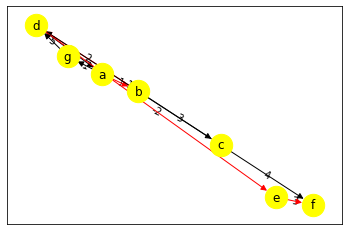

In [8]:
# матрица смежности
A = np.matrix(graph)
print(pathh)
# генерация графа по матрице смежности
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)
l=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
     'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
     'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
def mapping(x):
    return l[x]
# изменение названий вершин по мапе
G = nx.relabel_nodes(G, mapping, copy=False)

for i in range(len(pathh)):
    pathh[i]=l[pathh[i]]

options = {
    'node_color': 'yellow',
    'node_size': 500,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    
    
    "edge_color":edge_colors,
    "edge_cmap":plt.cm.Reds
}

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

print(pathh)
# result_path = [str(item) for item in pathh]
# for i in range(len(result_path)):
#     result_path[i]=l[result_path[i]]
color_edges = []
for i in range(len(pathh)-1): # добавляем в список цветных ребёр грани нашего пути
    color_edges.append( (pathh[i],pathh[i+1]))


edge_colors = ['black' if not edge in color_edges else 'red' for edge in G.edges()] # рёбра кратчайшего пути обозначаются
                                                                                   # подсвечиваются красным
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx(G, pos, arrows=True, **options)

#pylab.show()